
#Important Libraries

---



In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import pickle
import seaborn as sns
import math
from sklearn import metrics



#Connecting Google Colab with Google Drive

In [79]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Data Collection & Analysis

In [80]:
# loading the data from csv file to a Pandas DataFrame
path_insurance = '/content/drive/MyDrive/ML_Python/insurance (1).csv'

In [81]:
df_in= pd.read_csv(path_insurance)

In [82]:
# first 5 rows of the dataframe
df_in.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
df_in.shape

(1338, 7)

In [84]:
df_data = df_in

In [85]:
insurance_data = df_in

#Meta data: Description of the data

age:age of the insured person (numeric)

sex:gender of the insured person (categorical:male/female)

bmi:body mass index of the insured person (numeric)

children:number of children covered by the insurance plan (numeric)

smoker:whether or not the insured person is a smoker (categorical:yes/no)

region:region where the insured person resides (categorical:northeast/northwest/southeast/southwest)

charges:the insurance charges/cost billed to the insured person (numeric)

In [86]:

df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Exploratory Data Analysis

In [87]:
print("The dimension of the dataset:",df_in.shape)
print("The column headers :",df_in.columns)

The dimension of the dataset: (1338, 7)
The column headers : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [88]:
df_in.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [89]:
# Now checking null values in this dataset
df_in.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Data Visualization

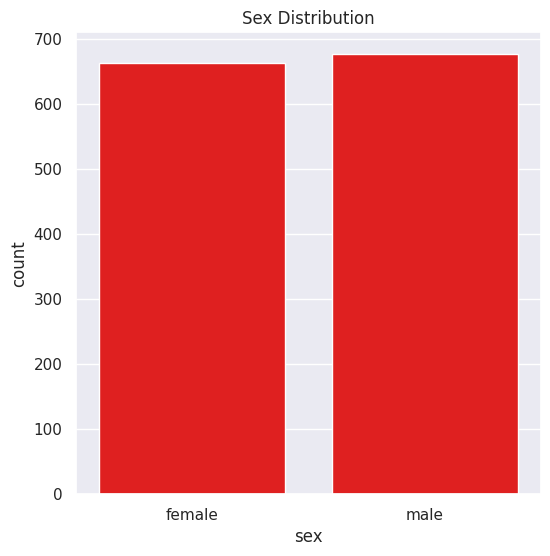

In [90]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df_in,color='red')
plt.title('Sex Distribution')
plt.show()

In [91]:
df_in['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-92-7e714952268a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_in['age'],color='green')


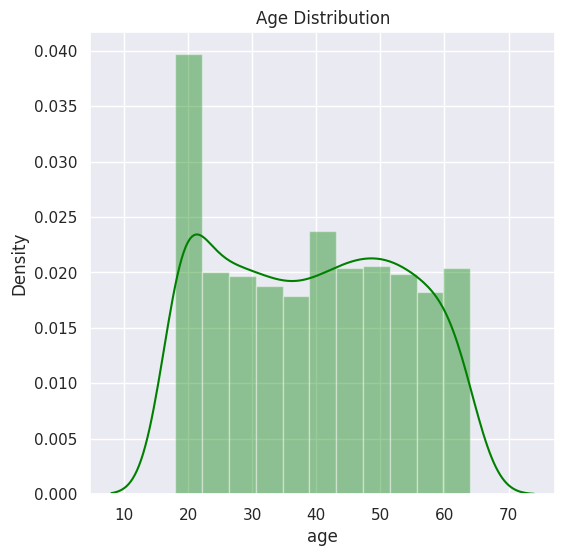

In [92]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df_in['age'],color='green')
plt.title('Age Distribution')
plt.show()

In [93]:
df_in['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

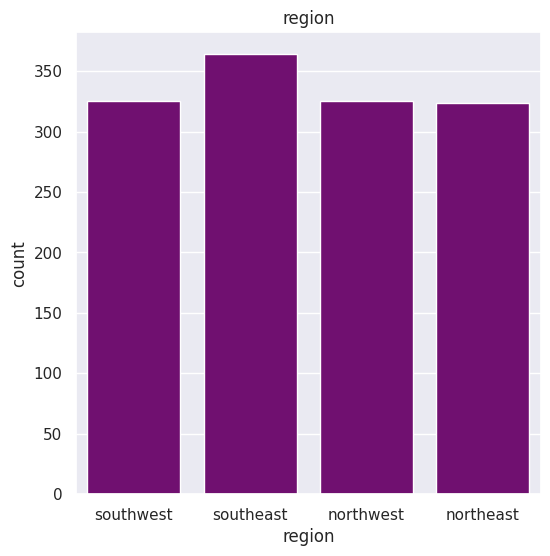

In [94]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df_in,color='purple')
plt.title('region')
plt.show()

In [95]:
df_in['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

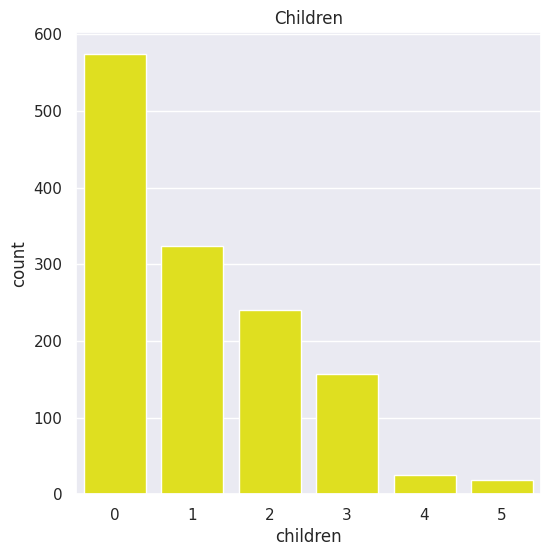

In [96]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df_in,color='yellow')
plt.title('Children')
plt.show()

In [97]:
df_in['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<ipython-input-98-43522af83ace>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_in['bmi'],color='blue')


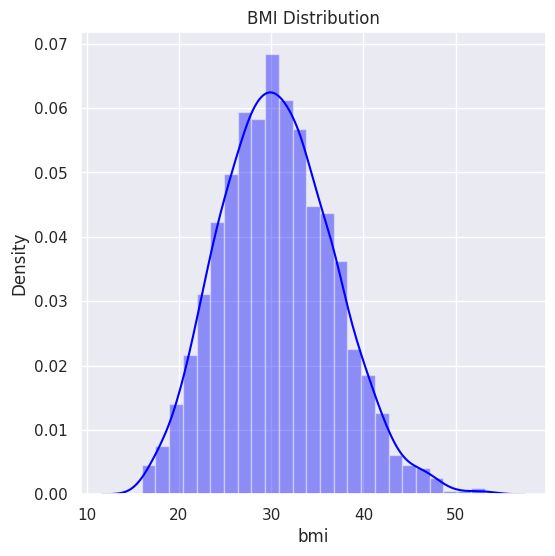

In [98]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df_in['bmi'],color='blue')
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

In [99]:
df_in['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

<ipython-input-100-35715d62c66c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_in['charges'],color='green')


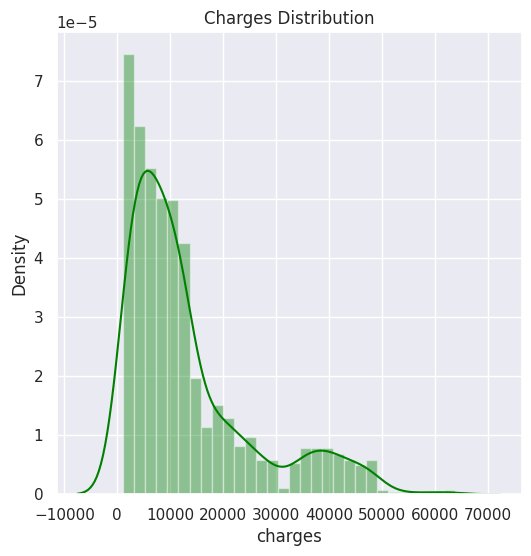

In [100]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df_in['charges'],color='green')
plt.title('Charges Distribution')
plt.show()

In [101]:
df_in['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

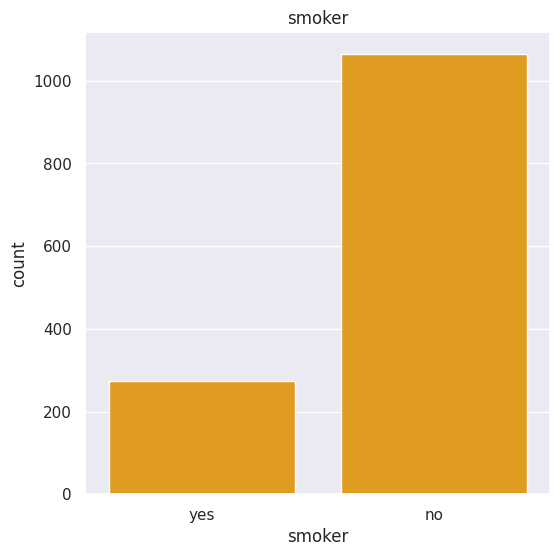

In [102]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df_in,color='orange')
plt.title('smoker')
plt.show()

In [103]:
df_in['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [104]:
df_in["smoker"]=df_in["smoker"].replace({"yes":1,"no":0})

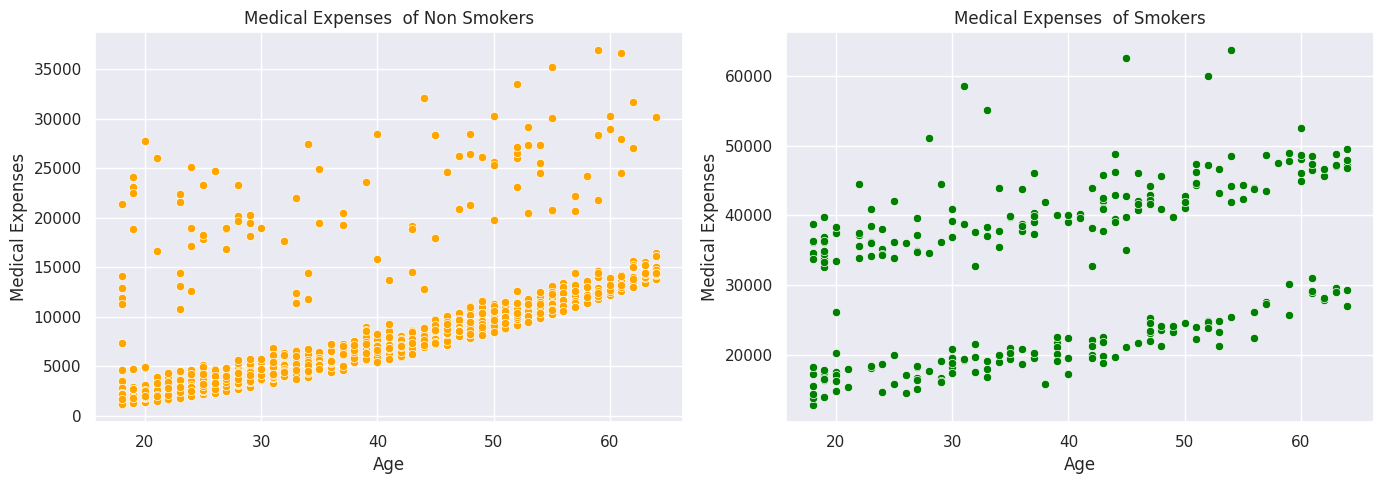

In [105]:
# Analysis of medical expenses of smokers vs non smokers
fig, axes = plt.subplots(1,2, figsize=(14,5))
# scatter plot for medical expenses of non smokers
sns.scatterplot(x="age", y="charges",data=df_in[df_in['smoker']==0],ax=axes[0],color='orange')
axes[0].set_title("Medical Expenses  of Non Smokers")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Medical Expenses")

# scatter plot for medical expenses of non smokers
sns.scatterplot(x="age", y="charges",data=df_in[df_in['smoker']==1], ax=axes[1],color='green')
axes[1].set_title("Medical Expenses  of Smokers")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Medical Expenses")

plt.tight_layout()
plt.show()

#Scatter Plot

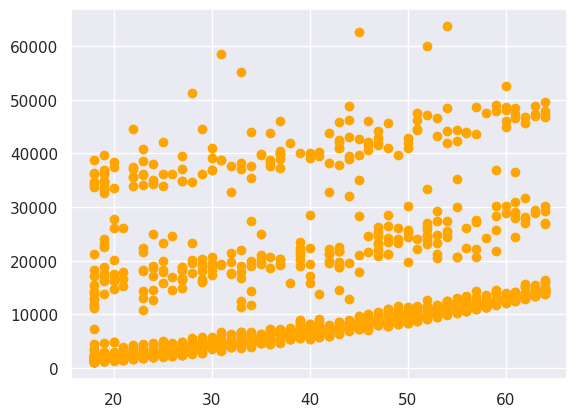

In [106]:
plt.scatter(data = df_in, x = 'age', y = 'charges',color='orange')


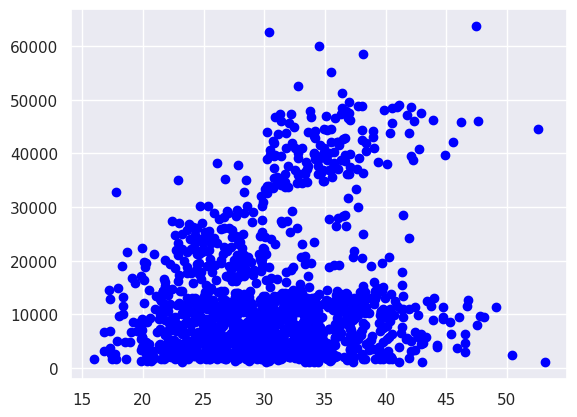

In [107]:
plt.scatter(data = df_in, x = 'bmi', y = 'charges',color='blue')

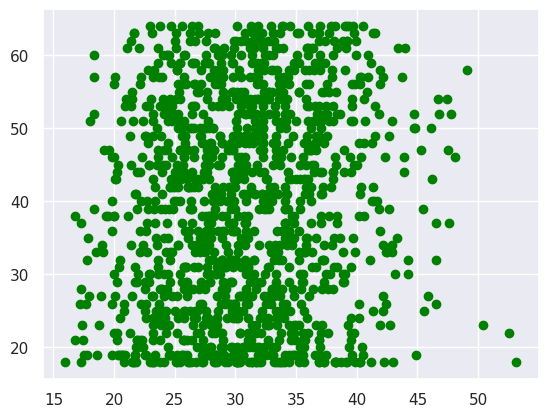

In [108]:
plt.scatter(data = df_in, x = 'bmi', y = 'age',color='green')

#Insurance Cost of Smoker And Non Smoker

In [109]:
smoker_df = df_in.groupby("smoker")["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,0,8434.268298
1,1,32050.231832


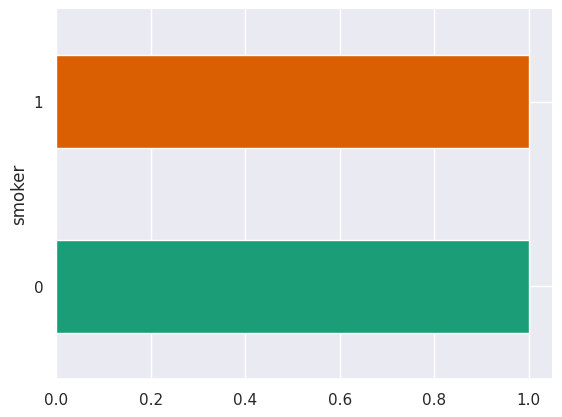

In [110]:
# @title smoker

from matplotlib import pyplot as plt
import seaborn as sns
smoker_df.groupby('smoker').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='smoker'>

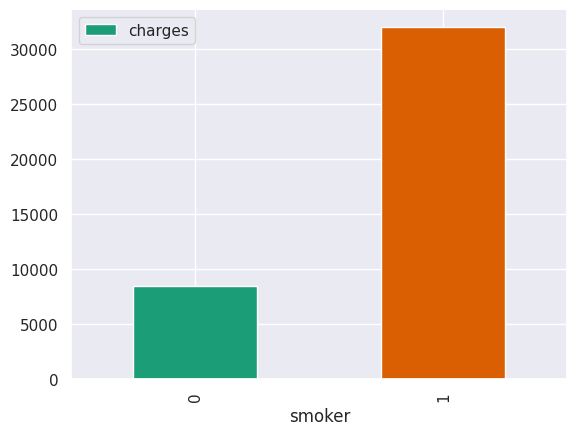

In [111]:
smoker_df.plot(kind = 'bar', x = 'smoker', y = 'charges',color=sns.palettes.mpl_palette('Dark2'))


#Insurance Cost for Male & Female

In [112]:
gender_df = df_in.groupby("sex")["charges"].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13956.751178


<Axes: ylabel='charges'>

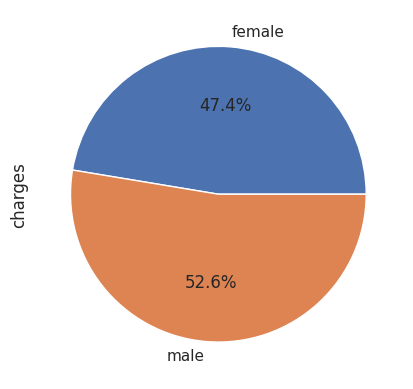

In [113]:
# @title Average Charges by Gender

gender_df.groupby('sex')['charges'].mean().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='sex'>

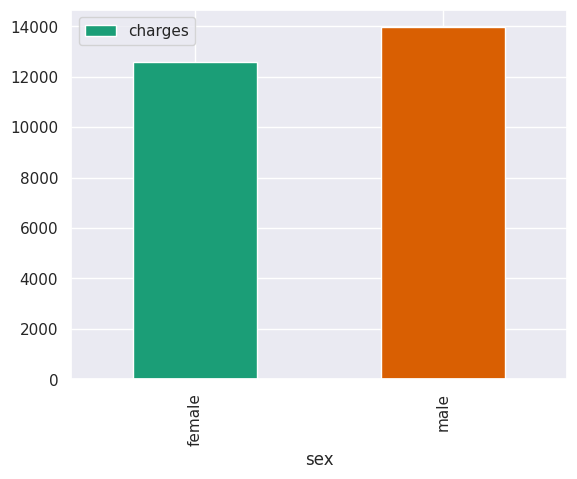

In [114]:
gender_df.plot(kind = 'bar', x= 'sex', y = 'charges',color=sns.palettes.mpl_palette('Dark2'))

#Region wise insurance cost

In [115]:
region_df = df_in.groupby("region")["charges"].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


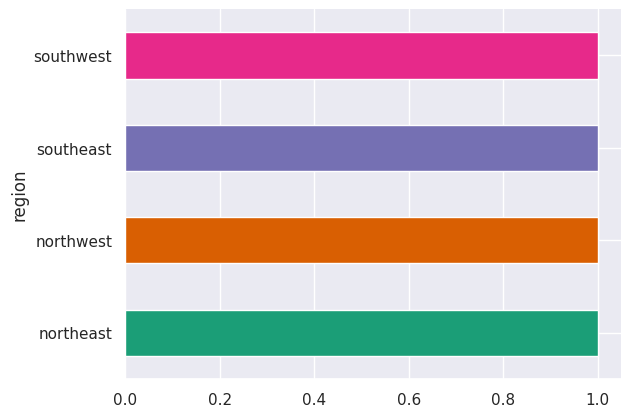

In [116]:
# @title region

from matplotlib import pyplot as plt
import seaborn as sns
region_df.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='region'>

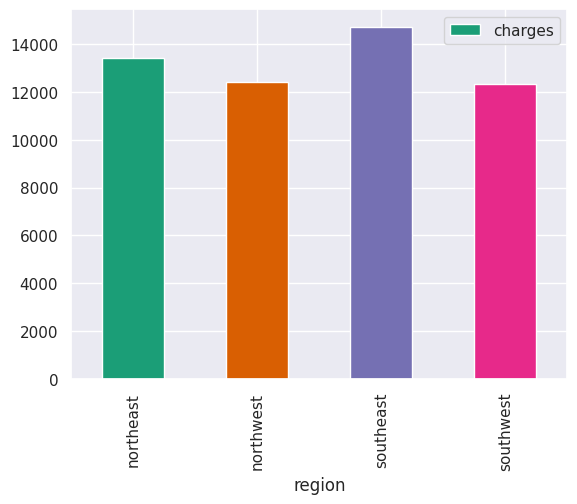

In [117]:
region_df.plot(kind = 'bar', x = 'region', y = 'charges',color=sns.palettes.mpl_palette('Dark2'))

#Region wise BMI

In [118]:
region_bmi_df = df_in.groupby("region")["bmi"].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.173503
1,northwest,29.199785
2,southeast,33.355989
3,southwest,30.596615


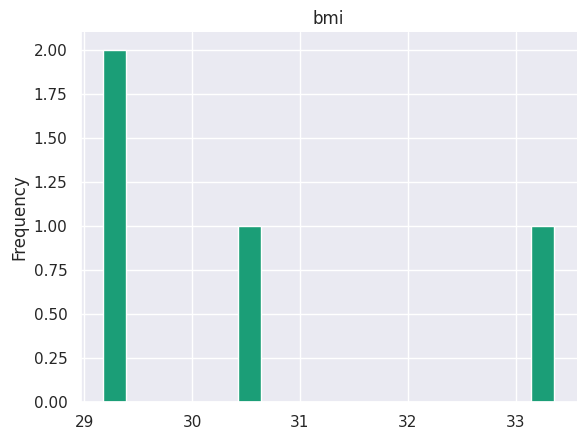

In [119]:
# @title bmi

from matplotlib import pyplot as plt
region_bmi_df['bmi'].plot(kind='hist', bins=20, title='bmi',color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

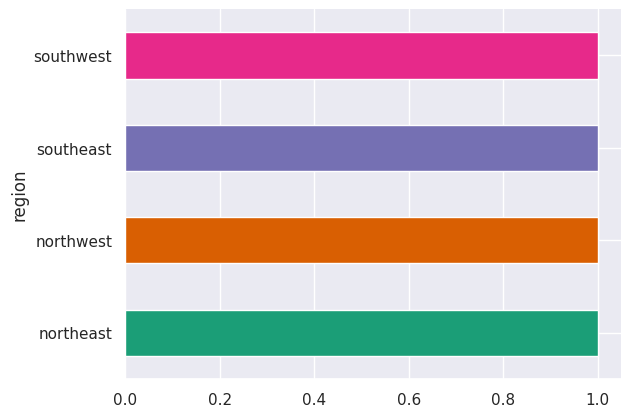

In [120]:
# @title region

from matplotlib import pyplot as plt
import seaborn as sns
region_bmi_df.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='region'>

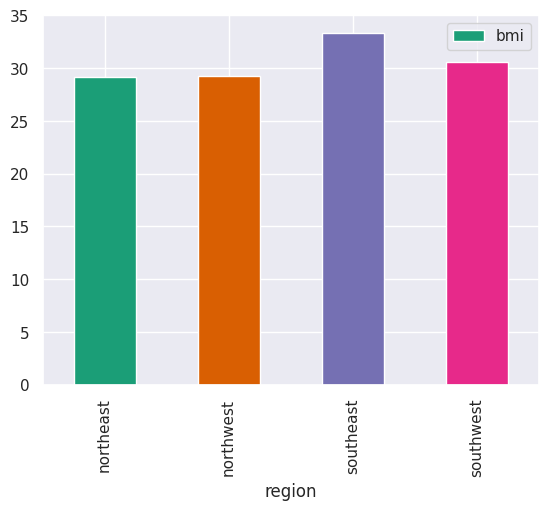

In [121]:
region_bmi_df.plot(kind = 'bar', x = 'region', y = 'bmi',color=sns.palettes.mpl_palette('Dark2'))

In [122]:
# Count values of each columns
for i in df_in.columns:
  print(df_in[i].value_counts())
  print("\n")

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
0    1064
1     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29330.

#Convert Categorical Coloumn to Numerical

#Categorical Features:

Sex

Smoker

Region

In [123]:
# Separating Numerical & Categorical Columns

# Checking for Categorical Columns
categorical_col = []
for i in df_in.dtypes.index:
  if df_in.dtypes[i]=="object":
    categorical_col.append(i)
print("categorical_columns:",categorical_col)


# Checking for Numerical Columns
numerical_col = []
for i in df_in.dtypes.index:
  if df_in.dtypes[i]!="object":
      numerical_col.append(i)
print("numerical columns:",numerical_col)


categorical_columns: ['sex', 'region']
numerical columns: ['age', 'bmi', 'children', 'smoker', 'charges']


In [124]:
# Checking number of unique values in each column
df_in.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [125]:
df_in.describe(include='float')

,bmi,charges
count,1338.000000,1338.000000
mean,30.663397,13270.422265
std,6.098187,12110.011237
min,15.960000,1121.873900
25%,26.296250,4740.287150
50%,30.400000,9382.033000
75%,34.693750,16639.912515
max,53.130000,63770.428010


In [126]:
df_in.describe(include='int')

,age,children,smoker
count,1338.000000,1338.000000,1338.000000
mean,39.207025,1.094918,0.204783
std,14.049960,1.205493,0.403694
min,18.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000
75%,51.000000,2.000000,0.000000
max,64.000000,5.000000,1.000000


In [127]:
df_in.describe(exclude='object')

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


In [128]:
df_in.describe(exclude='float')

,age,sex,children,smoker,region
count,1338.000000,1338,1338.000000,1338.000000,1338
unique,NaN,2,NaN,NaN,4
top,NaN,male,NaN,NaN,southeast
freq,NaN,676,NaN,NaN,364
mean,39.207025,NaN,1.094918,0.204783,NaN
std,14.049960,NaN,1.205493,0.403694,NaN
min,18.000000,NaN,0.000000,0.000000,NaN
25%,27.000000,NaN,0.000000,0.000000,NaN
50%,39.000000,NaN,1.000000,0.000000,NaN
75%,51.000000,NaN,2.000000,0.000000,NaN


In [129]:
df_in.describe(exclude='int')

,sex,bmi,region,charges
count,1338,1338.000000,1338,1338.000000
unique,2,NaN,4,NaN
top,male,NaN,southeast,NaN
freq,676,NaN,364,NaN
mean,NaN,30.663397,NaN,13270.422265
std,NaN,6.098187,NaN,12110.011237
min,NaN,15.960000,NaN,1121.873900
25%,NaN,26.296250,NaN,4740.287150
50%,NaN,30.400000,NaN,9382.033000
75%,NaN,34.693750,NaN,16639.912515


#Checking Duplicates in Dataframe


In [130]:
print("Total duplicates rows are ",df_in.duplicated().sum())

Total duplicates rows are  1


In [131]:
df_in.drop_duplicates(inplace=True)

#Relation Analysis

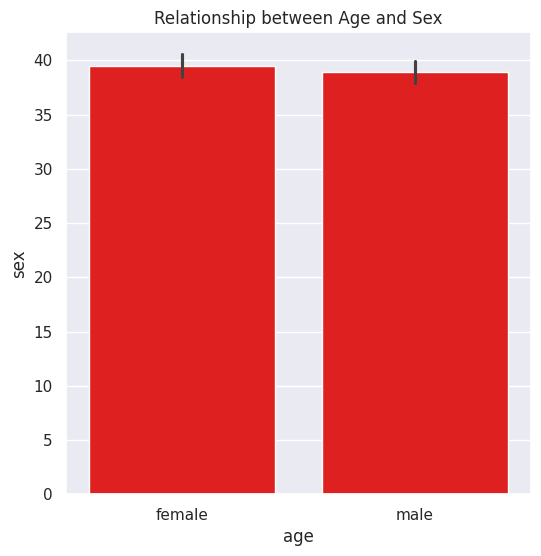

In [132]:
plt.figure(figsize=(6,6))
# Adjust the figure size as needed

#Create the bar plot
sns.barplot(x="sex", y= "age", data=df_in,color='red')

#Set labels & titles
plt.xlabel("age")
plt.ylabel("sex")
plt.title("Relationship between Age and Sex")
#Show the plot
plt.show()

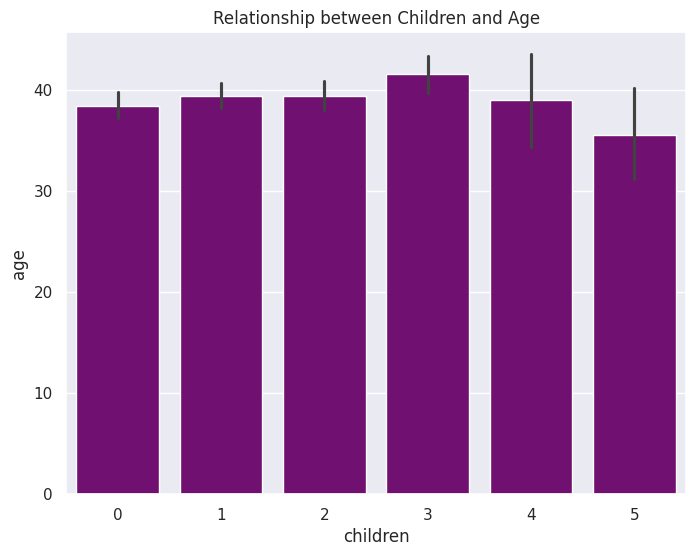

In [133]:
plt.figure(figsize=(8,6))
# Adjust the figure size as needed

#Create the bar plot
sns.barplot(x="children", y= "age", data=df_in,color='purple')

#Set labels & titles
plt.xlabel("children")
plt.ylabel("age")
plt.title("Relationship between Children and Age")
#Show the plot
plt.show()

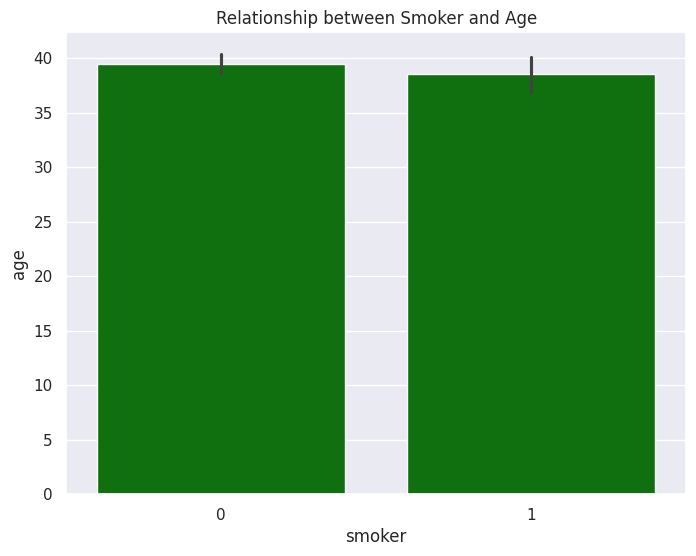

In [134]:
plt.figure(figsize=(8,6))
# Adjust the figure size as needed

#Create the bar plot
sns.barplot(x="smoker", y= "age", data=df_in,color='green')

#Set labels & titles
plt.xlabel("smoker")
plt.ylabel("age")
plt.title("Relationship between Smoker and Age")
#Show the plot
plt.show()

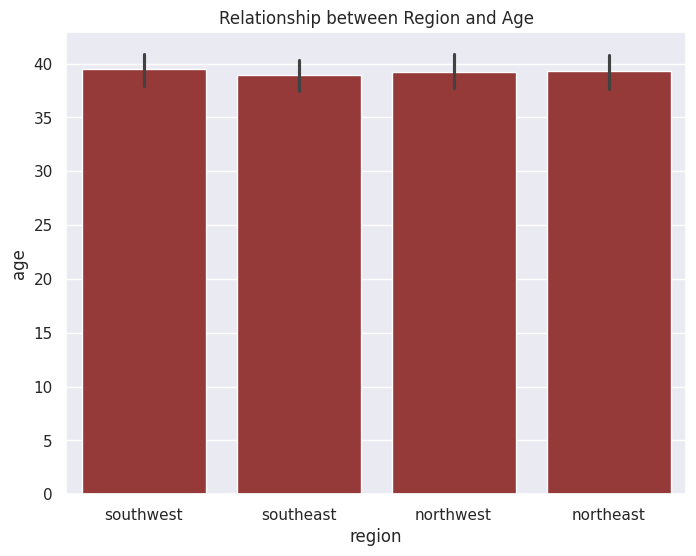

In [135]:
plt.figure(figsize=(8,6))
# Adjust the figure size as needed

#Create the bar plot
sns.barplot(x="region", y= "age", data=df_in,color='brown')

#Set labels & titles
plt.xlabel("region")
plt.ylabel("age")
plt.title("Relationship between Region and Age")
#Show the plot
plt.show()

#Multivariate Analysis

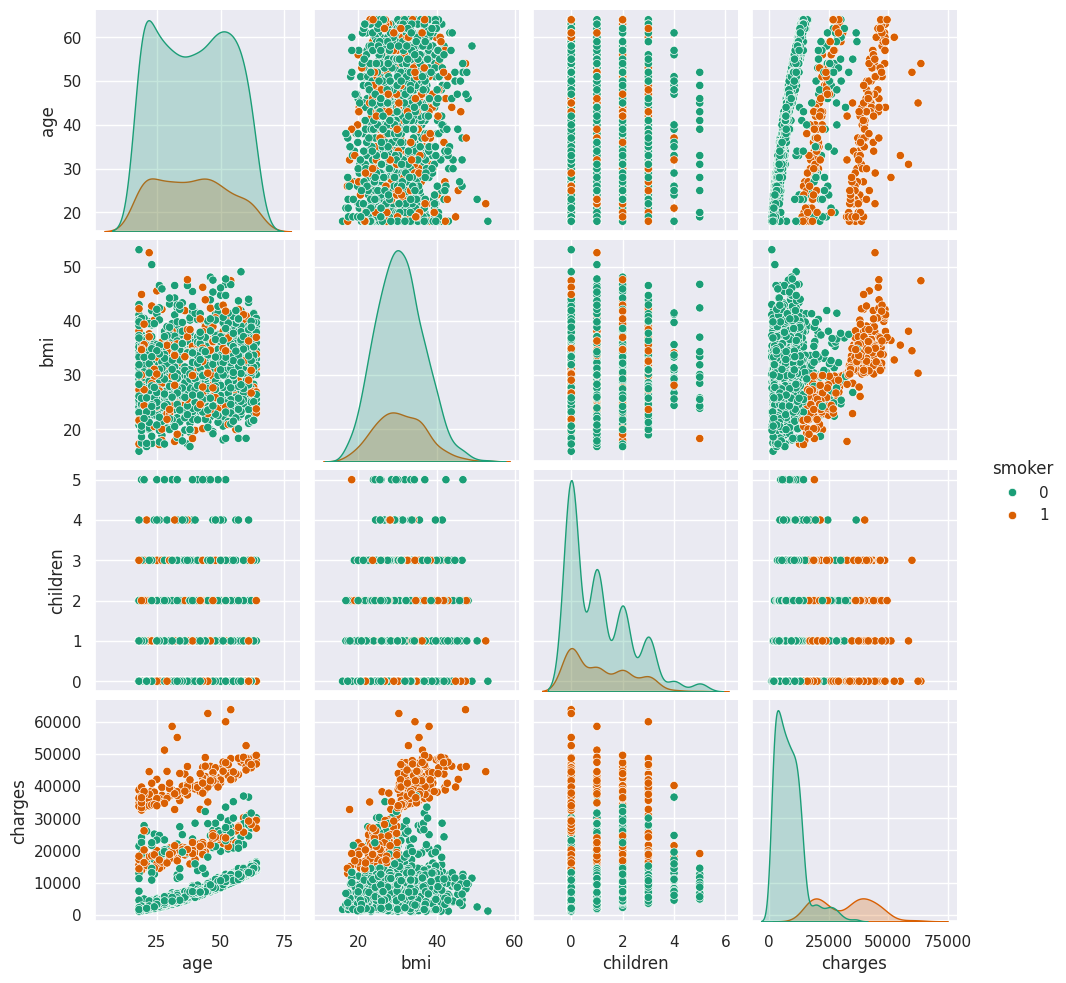

In [136]:
sns.pairplot(df_in,hue = "smoker", palette="Dark2")
plt.show()

#Checking for Outliers

<ipython-input-137-bce14ff1f8b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_in[col],palette="Dark2")
<ipython-input-137-bce14ff1f8b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_in[col],palette="Dark2")
<ipython-input-137-bce14ff1f8b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_in[col],palette="Dark2")
<ipython-input-137-bce14ff1f8b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

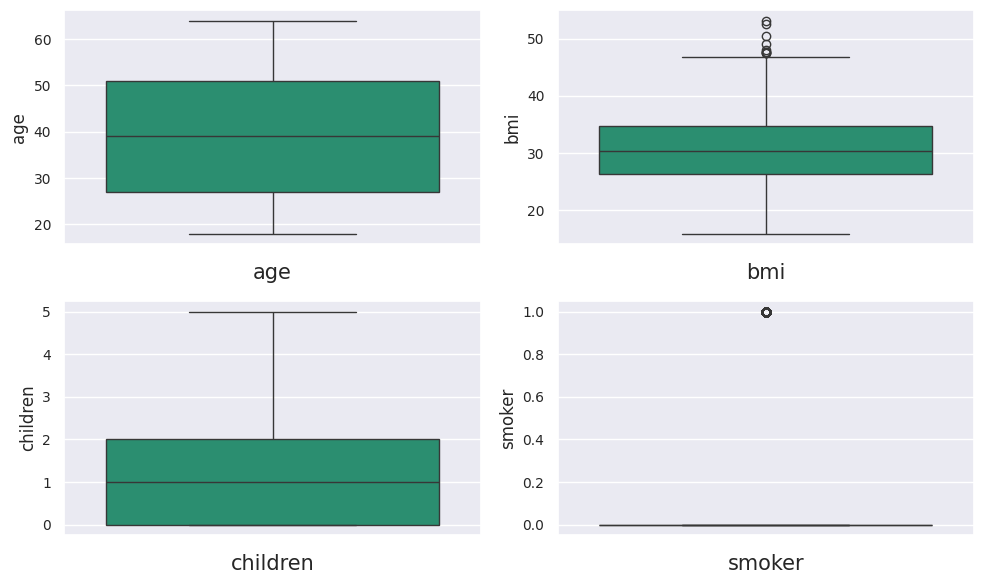

In [137]:
#Lets check the outliers by plotting box plot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
  if plotnumber<=4:
    ax=plt.subplot(2,2,plotnumber)
    sns.boxplot(df_in[col],palette="Dark2")
    plt.xlabel(col,fontsize=15)
    plt.yticks(rotation = 0 ,fontsize =10)
    plotnumber+=1
plt.tight_layout()

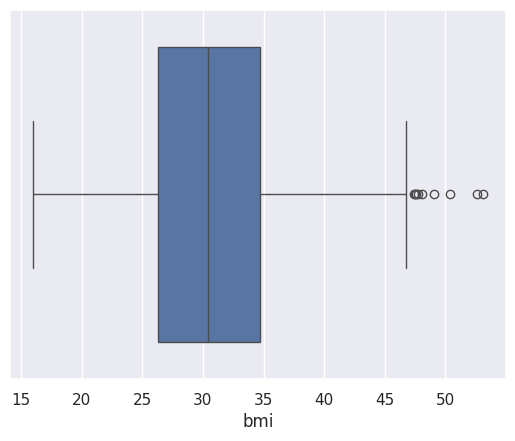

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

#Example : Cheacking outliers for 'bmi'using boxplot
sns.boxplot(x=df_in['bmi'])
plt.show()

In [139]:
df_in=df_in.drop(['region'],axis=1)

#Train

In [140]:
# X and Y sampels from data frame
X = df_in.drop(columns='sex', axis=1)
y = df_in['age']

In [141]:
train_x,test_x,train_y,test_y = train_test_split(X, y, test_size=0.2)

In [142]:
dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

In [143]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variables
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

#Decision Tree

In [144]:
#clasification report
# Make sure predict_y_dct is created and assigned a value
predict_y_dct = dt_model.predict(test_x)

#clasification report
clf_report_dct = classification_report(test_y, predict_y_dct)
print(clf_report_dct)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      20.0
           1       0.00      0.00      0.00      14.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00       3.0
           5       0.00      0.00      0.00       4.0
           6       0.00      0.00      0.00       4.0
           7       0.00      0.00      0.00       7.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00      11.0
          10       0.00      0.00      0.00       8.0
          11       0.00      0.00      0.00       6.0
          12       0.00      0.00      0.00       4.0
          13       0.00      0.00      0.00       9.0
          14       0.00      0.00      0.00       5.0
          15       0.00      0.00      0.00       2.0
          16       0.00      0.00      0.00       6.0
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

#Data Pre-Processing

Encoding the categorical features

In [145]:
# encoding sex column
df_in.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df_in.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df_in.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

#Splitting the Features and Target

In [146]:
X = df_in.drop(columns='charges', axis=1)
Y = df_in['charges']

#Splitting the data into Training data & Testing Data

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [148]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 5) (1069, 5) (268, 5)


#Model Training

#Linear Regression

In [149]:
# loading the Linear Regression model
regressor = LinearRegression()

In [150]:
regressor.fit(X_train, Y_train)

LinearRegression()

#Model Evaluation

In [151]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [152]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7583651175334847


In [153]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [154]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7136371386789739
